# Visualización de datos con Seaborn
Seaborn es una libreria de Python que trabaja por sobre Matplotlib. Esta libreria nos permite generar gráficos a partir de DataFrames de Pandas de manera muy cómoda y accesible. 

Antes de empezar a trabajar vamos a importar las librerias que ya conocemos de antes, y ahora sumaremos seaborn, la cual se suele importar con el nombre `sns`.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set()

## 1. Comparación con Matplotlib

### 1.1. Scatter Plot

Primero, vamos a poner en evidencia las ventajas que nos ofrece Seaborn frente a Matplotlib a la hora de trabajar con datos proveninetes de un DataFrame de Pandas. Para esto vamos a volver a cargar el dataset de Reviews de Vinos con el que trabajamos la clase anterior.

In [41]:
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('../class5/winemag-data_first150k.csv', usecols = fields)
wine_reviews.head()

,country,points,price,variety
0,US,96,235.0,Cabernet Sauvignon
1,Spain,96,110.0,Tinta de Toro
2,US,96,90.0,Sauvignon Blanc
3,US,96,65.0,Pinot Noir
4,France,95,66.0,Provence red blend


En el notebook anterior vimos cómo hacer para graficar el precio vs. el puntaje de todos los vinos. Para lograrlo, precisábamos crear, a partir del DataFrame, vectores con los precios y con los valores de los vinos, y luego usar estos vectores para graficar. Debíamos, además, agregar la información en los labels de cada eje a mano:

[Text(0, 0.5, 'points'), Text(0.5, 0, 'price')]

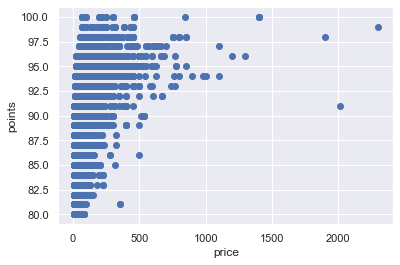

In [43]:
# Tomamos como coordenadas en x los precios
x = wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
y = wine_reviews.points.values

fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='price', ylabel='points')

Si queremos graficar este mismo scatter plot usando seaborn, sólo precisamos escribir una linea de código:

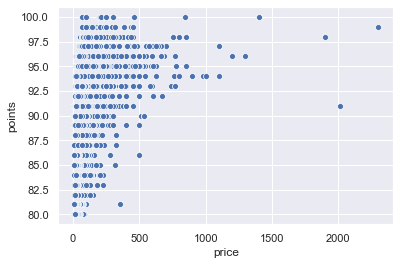

In [45]:
ax = sns.scatterplot(x="price", y="points", data=wine_reviews)

La ventaja de utilizar esta libreria radica en que podemos indicarle a la función `scatterplot` de seaborn cual es el Dataframe del cual queremos tomar los datos para graficar a traves del argumento `data` (`data=wine_reviews`).

De esta forma, al darle los nombres de las columnas que queremos usar en los ejes `x` e `y`, la librearia ya interpreta que debe tomar los valores correspondientes a esas columnas para graficar (en este caso, `x="price"` e `y="points"`).

### 1.2. Scatter Plot con labels

Vamos a armar ahora un dataset que contenga únicamente los vinos Argentinos, Chilenos y Españoles.

In [46]:
lista_paises = ['Argentina','Chile','Spain']
wine_reviews_filtradas = wine_reviews[wine_reviews['country'].isin(lista_paises)]
wine_reviews_filtradas.head()

,country,points,price,variety
1,Spain,96,110.0,Tinta de Toro
5,Spain,95,73.0,Tinta de Toro
6,Spain,95,65.0,Tinta de Toro
7,Spain,95,110.0,Tinta de Toro
17,Spain,95,80.0,Tempranillo


**Ejercicio:** Siguiendo lo realizado en el notebook anterior, realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Argentina, España o Chile).

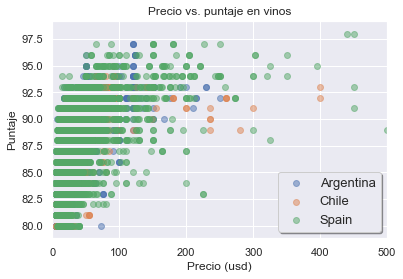

In [47]:
fig = plt.figure()
ax = plt.axes()
for a in lista_paises:
    b = wine_reviews_filtradas[wine_reviews_filtradas['country'] == a]
    ax.scatter(b.price, b.points, label =  a, alpha = .5)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,500))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

Para realizar este mismo gráfico con seaborn, solo precisamos una linea de código: 

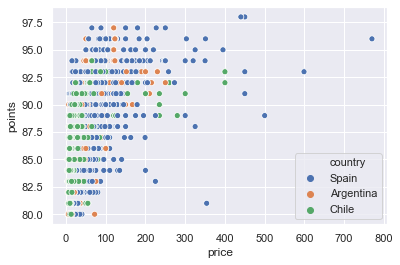

In [49]:
ax = sns.scatterplot(x="price", y="points", hue="country" , data=wine_reviews_filtradas)

En este caso, le estamos indicando a la funcion `scatterplot` que no solo queremos que tome la columna `price` como eje `x` y la columna `points` como eje `y`, sino que además queremos que indique con colores distintos los puntos segun su valor de la columna `country`. Esto lo hacemos mediante el argumento `hue` (`hue="country"`).

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar algunas de las funciones de visualización que nos ofrece esta libreria.

## 2. Categorical Plots

Vamos a trabajar con el Dataset Iris. En el mismo tenemos 4 features distintos (medidas de ancho y largo de pétalos y sepas) y tres labels distintos (variedad a la que pertenece la flor).

In [72]:
iris_data = pd.read_csv('../DS_Clase_04_iris.csv')
iris_data.drop(columns = ['Id'], inplace= True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2.1. Categorical plot básico

Como su nombre lo indica, los categorical plots son gráficos donde una de las variables a graficar es de tipo categórica. Este tipo de gráficos son muy usados en Data Science y Seaborn tiene una función especial dedicada a ellos, `catplot`.

Primero veamos un ejemplo de cómo hacer para realizar un grafico de este tipo en Matplotlib. El objetivo es graficar el ancho del petalo según la especie .

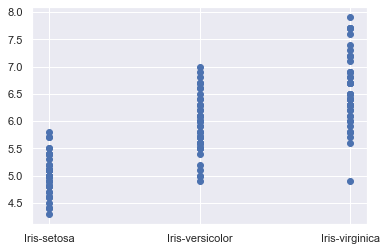

In [73]:
especie = iris_data['Species']
ancho_petalo = iris_data['SepalLengthCm']

fig = plt.figure()
ax = plt.axes()
ax.scatter(especie,ancho_petalo)

Como podemos observar el resultado no es muy satisfactorio. Al estar todos los puntos sobre una misma linea, no se pueden distinguir entre sí. 

Veamos ahora como realizar el mismo gráfico son seaborn:

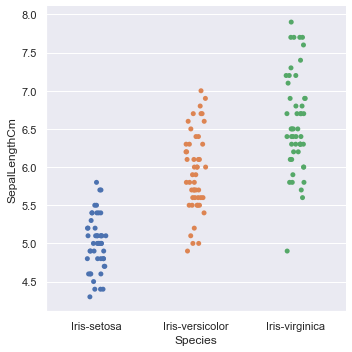

In [52]:
sns.catplot(data = iris_data, x = "Species", y = "SepalLengthCm")

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

**Ejercicos**:

1. Realizar con Seaborn un gráfico del ancho del petalo según la especie
2. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind`.
3. ¿Que representan las barritas negras?
4. Averiguar la utilidad de los parámetros `ci` y `estimator`.

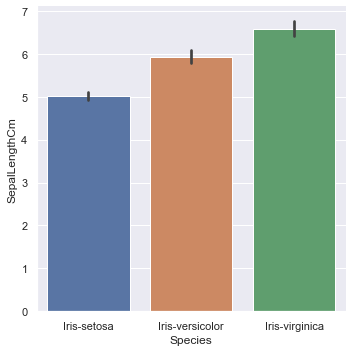

In [65]:
#estimator se usa para determinar una funcion dentro del grafico

sns.catplot(x = "Species", y = "SepalLengthCm", kind = "bar", data = iris_data);



### 2.2. Boxplot

Volvamos al dataset de vinos. Vamos a armar un nuevo dataset solo con los vinos de Argentina, Chile y España, pero esta vez sólo con las siguietnes variedades: 'Malbec', 'Red Blend' y 'Cabernet Sauvignon'.

In [61]:
lista_variedades = ['Malbec','Red Blend','Cabernet Sauvignon']
vinos = wine_reviews_filtradas[wine_reviews_filtradas['variety'].isin(lista_variedades)].dropna()
vinos.head()

,country,points,price,variety
60,Argentina,91,30.0,Malbec
62,Argentina,91,25.0,Malbec
115,Argentina,86,15.0,Malbec
159,Chile,89,19.0,Red Blend
179,Chile,89,61.0,Red Blend


Queremos realizar un único gráfico que muestre el precio de los vinos en gráfico de cajas (boxplots) para los 3 distintos paises y las 3 variedades de vinos. Debemos entonces usar el parámetro `kind='box'` para determinar que queremos un gráfico de cajas y el parámetro `col='country'` para indicar que queremos tantos ejes en el gráfico como valores distintos hay en el campo `country`.

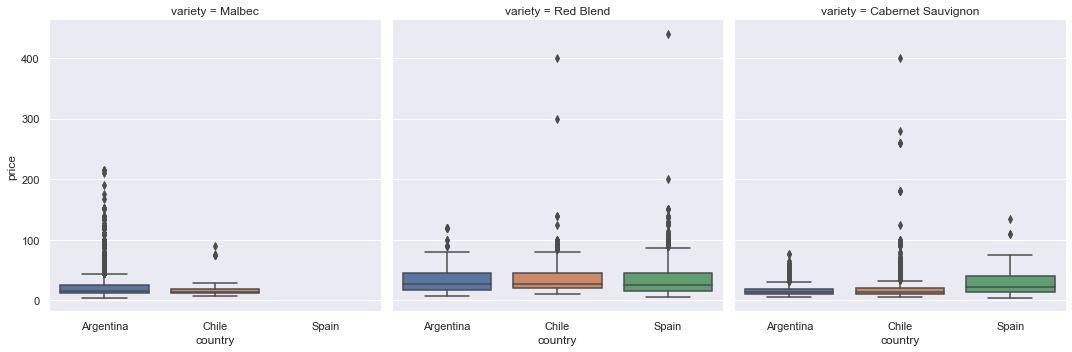

In [82]:
sns.catplot(x="country", y="price", col="variety", kind='box' , data=vinos)


**Ejercicios**:

1. En el último gráfico, era difícil visualizar bien los resultados debido a precios que eran mucho más grandes que los demás. ¿Cómo podría solucionar facilmente este problema? 
2. Averigüe cómo cambiar el gráfico si desea que los 3 ejes aparezcan apilados verticalmente en lugar de uno al lado del otro.
3. Averigüe cómo hacer un violin plot y conjeture en qué circunstancias podría ser de utilidad.

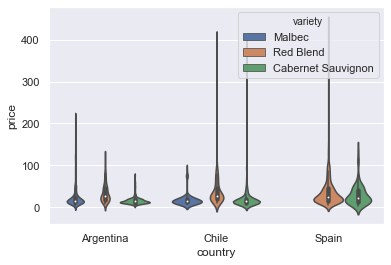

In [63]:
sns.violinplot(x="country", y="price", hue="variety", data=vinos)

## 3. Histogramas: Graficar la distribución de una variable aleatoria

Seaborn posee una función para graficar la distribución de una variables aleatoria llamada `distplot()`. La misma tiene tres parametros principales

* `hist`: Es el parametro que controlo si dibujamos o no el histograma (por default en `True`).
* `kde`: permite graficar un estimado de la distribución mediante una técnica llamada Kernel Density Estimation, KDE para los amigos (por default en `True`).
* `rug`: Dibuja sobre el eje horizonal una pequeña linea por cada valor, esto se llama rugplot (por default en `False`).

Ademas también peude tomar el parámetro `bins`, con el cual determinamos al cantidad de barras del histograma.

Para el caso del dataset dataset Iris podriamos graficar, por ejemplo, la distribución del largo de los pétalos:

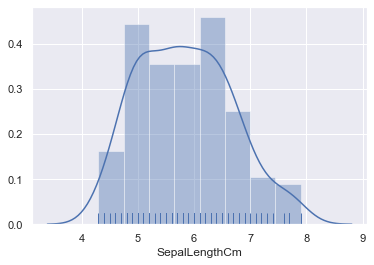

In [64]:
sns.distplot(iris_data['SepalLengthCm'], hist=True, kde=True, rug=True)

Con el fin de comparar, se pueden graficar varias distribuciones en una misma figura. Por ejemplo, para el caso del dataset de vinos, podemos graficar el precio según variedad:

(0, 100)

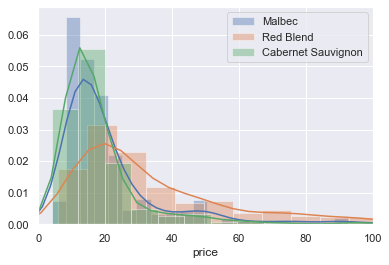

In [56]:
sns.distplot(vinos[vinos['variety'] == 'Malbec'].price)
sns.distplot(vinos[vinos['variety'] == 'Red Blend'].price)
sns.distplot(vinos[vinos['variety'] == 'Cabernet Sauvignon'].price)

plt.legend(['Malbec','Red Blend','Cabernet Sauvignon'])
plt.xlim(0,100)

Otra función interesante de Seaborn es la función `jointplot()`, la cual grafica un scatterplot junto a dos histogramas, uno para cada una de las variables. 

Dejamos un ejemplo de su uso en el iris dataset, y pueden recurrir a su documentación para mas detalles: https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

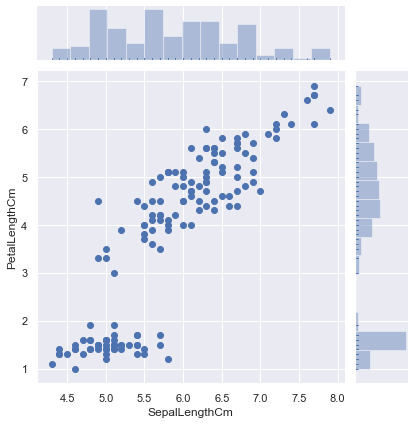

In [57]:
sns.jointplot(x="SepalLengthCm", y="PetalLengthCm", marginal_kws=dict(bins=15, rug=True), data=iris_data)

**Ejercicios**:

1. Genere un nuevo dataset a partir del dataset de vinos original (wine_reviews) que contenga sólo los vinos cuya variedad es Pinot Noir.
2. Descarte de este dataset las instancias que contengan un `NaN` en alguno de sus campos.
3. Descarte del dataset los vinos con un precio mayor a 200. Para esto pueden generarse una máscara.
4. Graficar en Seaborn un `distplot` con los precios de vinos que contenga el histograma, el KDE y el rugplot.

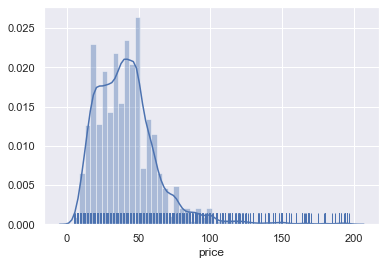

In [68]:
wine_reviews = pd.read_csv('../class5/winemag-data_first150k.csv', usecols = fields)
wine_reviews.dropna(inplace=True)
wine_reviews =  wine_reviews[wine_reviews['variety'] =='Pinot Noir']
wine_reviews = wine_reviews[wine_reviews['price'] < 200]
sns.distplot(wine_reviews['price'], hist=True, kde=True, rug=True)

## 4. Pairplots

La función `pairplot()` de Seaborn será utilizada reiteradas veces durante la cursada, ya que resulta muy cómoda para hacer una primera inspección de un dataset.

La misma genera una grilla de N x N ejes, donde N es el número de variables numéricas que tiene el dataset (features que toman valores numéricos). Para cada par de variables numéricas, genera un scatterplot y en la diagonal grafica la distribucion de esos valores.

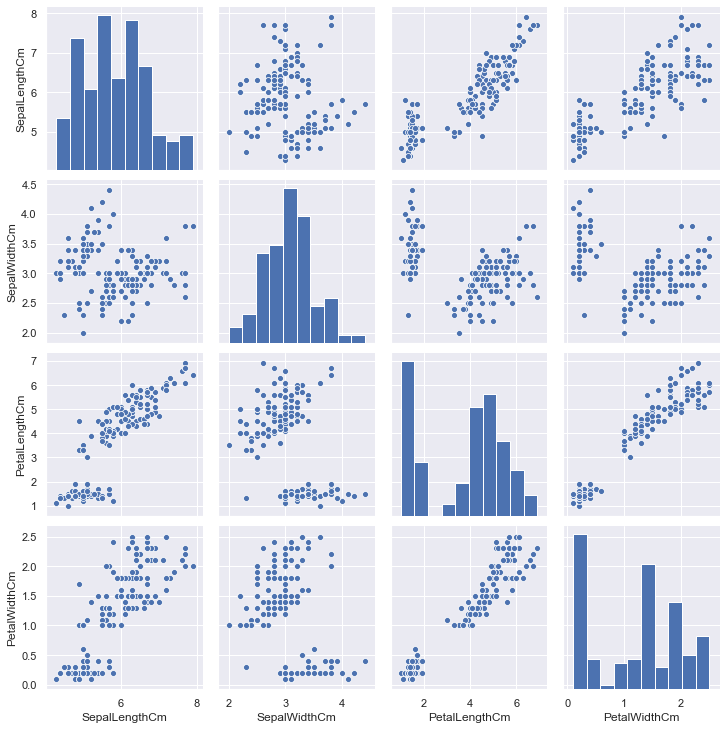

In [69]:
sns.pairplot(data=iris_data)

Además, podemos diferenciar los datos según alguna de las variables categóricas del dataset mediante el parámetro `hue`. Esto resulta particularmente útil en el caso que querramos usar las variables numericas con el fin de predecir esta varaible categórica (ya desarrollaremos esta idea en las próximas clases).

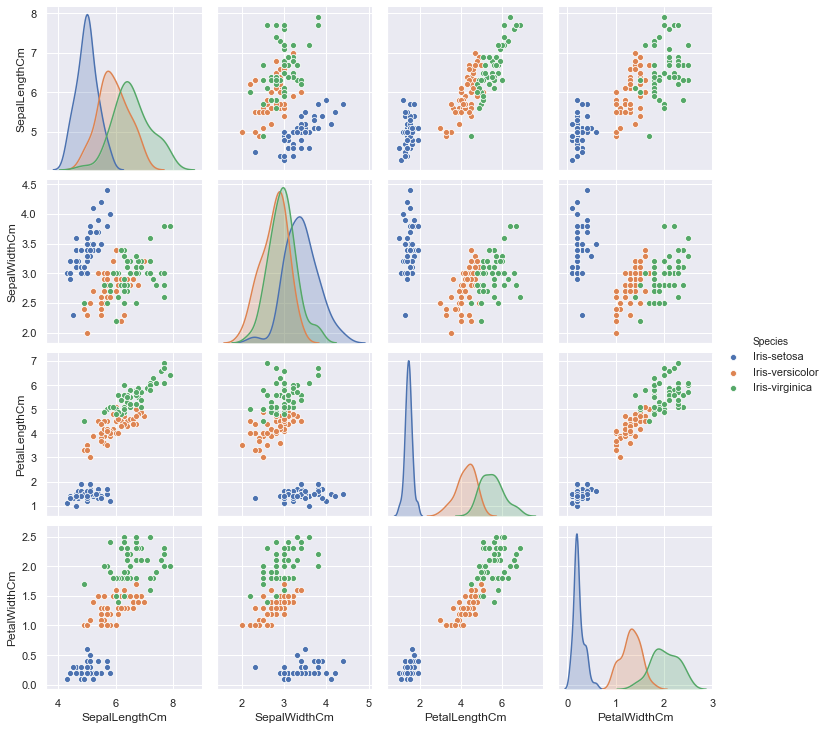

In [70]:
sns.pairplot(data=iris_data, hue="Species")

**Ejercicios:**

1. Graficar un `pairplot` para el dataset de vinos reducido (3 paises y 3 variedades). Antes de hacerlo, ¿cuantas filas y cuantas columans espera que tenga este gráfico? 
9
2. Graficar el mismo `pairplot`, pero esta vez distinga los datos según variedad.
3. Idem al punto anterior, pero distinga según país.

In [ ]:
sns.pairplot(data=iris_data, hue="Species")

## 5. Heatmaps (y correlación)

Correr la siguiente celda y googlear: ¿Qué es un heatmap?¿Cómo se hacen en Seaborn?¿Qué hace la función `corr()` de Pandas?¿Cuáles son sus parámetros?¿Qué hace el parámetro `method`? Interpretar el gráfico obtenido.

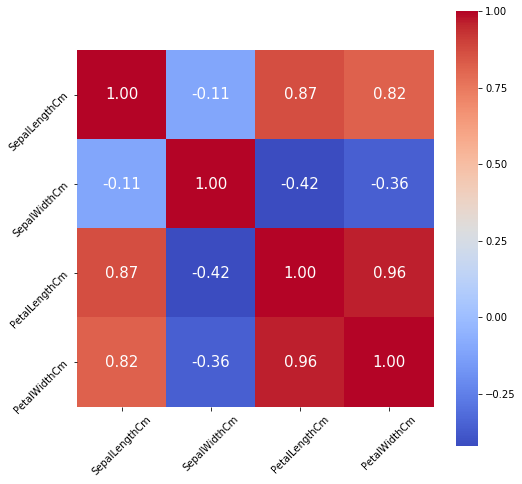

In [31]:
corr = iris_data.drop(columns = 'Species').corr()  #is used for find corelation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= iris_data.drop(columns = 'Species').columns, 
           yticklabels= iris_data.drop(columns = 'Species').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

**Volver a correr todo el notebook, pero descomentando la línea `sns.set()` en los import de librerías. ¿Qué hace?**

**Volver a correr todo el notebook, pero descomentando la línea `sns.set()` en los import de librerías. ¿Qué hace?**